In [3]:
from transformers import pipeline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix

In [4]:
classifier = pipeline('text-classification', model='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment')

# Get labels
labels = classifier.model.config.id2label

print(labels)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

{0: 'positive', 1: 'negative', 2: 'neutral'}


In [5]:

sentences = ['أنا بخير', 'أنا لست بخير']
classifier(sentences)


[{'label': 'positive', 'score': 0.8008126616477966},
 {'label': 'negative', 'score': 0.6131935715675354}]

In [6]:
# prompt: give me list of positive and negative arabic sentences and classifier them by my classifier
sentences = ['أنا سعيد جداً', 'أحب هذا الطقس', 'لقد فزت باليانصيب','أنا حزين جداً', 'أكره هذه الوظيفة', 'لقد فقدت وظيفتي']

classifier(sentences)

[{'label': 'positive', 'score': 0.9740686416625977},
 {'label': 'positive', 'score': 0.965278148651123},
 {'label': 'positive', 'score': 0.9628039002418518},
 {'label': 'negative', 'score': 0.9173030257225037},
 {'label': 'negative', 'score': 0.9944387674331665},
 {'label': 'negative', 'score': 0.7966250777244568}]

In [7]:
s="لتطبيق لا يغتح دائما بيعطيني لا يوجد اتصال بالشبكة..مع انه النت عندي تمام شو الحل??"
classifier(s)

[{'label': 'negative', 'score': 0.8525051474571228}]

In [8]:
s="برنامج توترز توصيل احلى من برنامجكم فاشل"
classifier(s)

[{'label': 'negative', 'score': 0.9926905035972595}]

In [9]:
import torch
torch.cuda.is_available


<function torch.cuda.is_available() -> bool>

In [10]:
torch.cuda.current_device()

0

In [11]:
classifier=pipeline('text-classification', model='CAMeL-Lab/bert-base-arabic-camelbert-ca-sentiment',device=0)

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [13]:
df_=pd.read_csv("CompanyReviews.csv")
df_.head()

,Unnamed: 0,review_description,rating,company
0,0,رائع,1,talbat
1,1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat
2,2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat
4,4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat


In [14]:
df=df_[['review_description','rating']].copy()

In [15]:
len(df)

40046

In [18]:
df=df.sample(n=1000)

In [17]:
len(df)

1000

<Axes: >

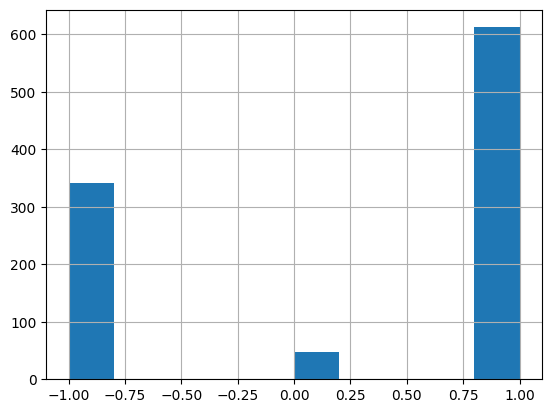

In [19]:
df['rating'].hist()

In [ ]:
#df=df[df.rating != 0].copy()

In [ ]:
#df['rating'].hist()

In [ ]:
#df.head()

In [20]:
target_map={1:0, -1:1,0:2}
df['rating']= df['rating'].map(target_map)

In [23]:
print(df['review_description'].dtype)

object


In [24]:
df['review_description'] = df['review_description'].astype(str)

In [25]:
import re
def remove_symbols(text):
    return re.sub(r'[^\w\s]', '', text)


df['review_description'] = df['review_description'].apply(remove_symbols)

In [21]:
df.head()

,review_description,rating
3930,مفيش كل المطاعم,1
1838,داياااااايم,0
1597,حلوو التطبيق لكن في مشكله لو تسوون نطلب اكثر م...,0
11036,كذا هاذا الى يستاهله التطبيق,1
16685,جيد جداً 😘😘,0


In [26]:
print(classifier.model.config.max_position_embeddings)

512


In [27]:
texts = df['review_description'].tolist()
texts

['مفيش كل المطاعم',
 'داياااااايم',
 'حلوو التطبيق لكن في مشكله لو تسوون نطلب اكثر من متجر ف وقت واحد يكون فلوس التوصيل واحد ',
 'كذا هاذا الى يستاهله التطبيق',
 'جيد جدا ',
 'جديد',
 'كل شوية يغيروا تفاصيل الرحلة وغيروا محطة نزولي من غير أي تنبيه ونزلت في مكان بعيد عن المكان اللي كنت رايحاه واتأخرت جدا طبعا ولما كنت بتأكد من خدمة العملاء قبل ما أركب قالي أيوة هيوديكي نفس المكان مش أول مرة تحصل انهم يحجزولي في رحلة تانية من غير أي تنبيه اكيد مش هحاول أحجز تاني ولا أركب سويڤل تاني بالطريقة دي',
 'تطبيق رائع وخدمة رائعة',
 'خره جامد',
 'لا اله الا الله محمد رسول الله البرنامح ممتاز',
 'تحياتي وتقديري واحترامي لكل العملاء',
 'ولله اني حبيت التطبيق اتمنا انكم تضيفونا على جميع الدول العربيه',
 'ممتاز ومفيد جدا شكرا لكم لتوفير الوقت والجهد مقابل مبلغ بسيط',
 'تجربه رائعه وتعامل راقي',
 'سرعة وسهل الطلب والوصول',
 'اسعارهم اغلا من المحلات ب كثير و بحطولك توصيل مجاني حكي فاضي التطبيق لا انصح به',
 'هو حلو لاكن اذا كان المكان بعيد عن المنطقه 2 كيلو مايوصل',
 'ممتاز جدا جدا',
 'كله مشاكل ولا يست

In [28]:
texts = df['review_description'].tolist()
predictions = classifier(texts)
predictions

[{'label': 'positive', 'score': 0.9553259015083313},
 {'label': 'neutral', 'score': 0.499494343996048},
 {'label': 'neutral', 'score': 0.43146294355392456},
 {'label': 'negative', 'score': 0.9717037677764893},
 {'label': 'positive', 'score': 0.8020714521408081},
 {'label': 'negative', 'score': 0.5232039093971252},
 {'label': 'negative', 'score': 0.8393505811691284},
 {'label': 'positive', 'score': 0.9832761287689209},
 {'label': 'negative', 'score': 0.9640055894851685},
 {'label': 'positive', 'score': 0.9370588660240173},
 {'label': 'positive', 'score': 0.9912960529327393},
 {'label': 'positive', 'score': 0.9783723950386047},
 {'label': 'positive', 'score': 0.9912180304527283},
 {'label': 'positive', 'score': 0.7624196410179138},
 {'label': 'positive', 'score': 0.8271437287330627},
 {'label': 'negative', 'score': 0.9053747653961182},
 {'label': 'positive', 'score': 0.6775043606758118},
 {'label': 'positive', 'score': 0.9844309687614441},
 {'label': 'negative', 'score': 0.96861702203750

In [34]:
print(df['rating'])

3930     1
1838     0
1597     0
11036    1
16685    0
        ..
34019    1
34427    0
30153    0
1939     0
14863    0
Name: rating, Length: 1000, dtype: int64


In [38]:
preds = [0 if d['label'] == 'positive' else 1 if d['label'] == 'negative' else 2 for d in predictions]

preds = np.array(preds)

In [39]:
print("acc:", np.mean(df['rating']== preds))

acc: 0.628


In [40]:
cm = confusion_matrix(df['rating'], preds, normalize= 'true')
cm

array([[0.60784314, 0.19117647, 0.20098039],
       [0.12316716, 0.71847507, 0.15835777],
       [0.34042553, 0.42553191, 0.23404255]])